table of contents
1. マスタ
1. トラッキングデータ

In [22]:
import os
import json

import numpy as np
import pandas as pd

import dataframe_image as dfi

import plotly.express as px
import plotly.tools as tls

import matplotlib.pyplot as plt
import matplotsoccer

In [2]:
base_dir = os.path.join('..')
data_dir = os.path.join(base_dir, 'data')
fig_dir = os.path.join(base_dir, 'figure')

In [3]:
os.listdir(data_dir)

['.DS_Store', 'matches', 'matches.json']

# マスタ

In [4]:
mst_df_match = pd.read_json(os.path.join(data_dir, 'matches.json'))

In [5]:
mst_df_match.style.hide_index()

status,date_time,home_team,away_team,id
closed,2020-07-02 19:15:00+00:00,{'short_name': 'Manchester City'},{'short_name': 'Liverpool'},4039
closed,2020-05-26 16:30:00+00:00,{'short_name': 'Dortmund'},{'short_name': 'Bayern Munchen'},3749
closed,2020-03-08 19:45:00+00:00,{'short_name': 'Juventus'},{'short_name': 'Inter'},3518
closed,2020-03-01 20:00:00+00:00,{'short_name': 'Real Madrid'},{'short_name': 'FC Barcelona'},3442
closed,2019-12-18 19:00:00+00:00,{'short_name': 'FC Barcelona'},{'short_name': 'Real Madrid'},2841
closed,2019-11-10 16:30:00+00:00,{'short_name': 'Liverpool'},{'short_name': 'Manchester City'},2440
closed,2019-11-09 17:30:00+00:00,{'short_name': 'Bayern Munchen'},{'short_name': 'Dortmund'},2417
live,2019-10-27 20:00:00+00:00,{'short_name': 'Paris'},{'short_name': 'Marseille'},2269
closed,2019-10-06 18:45:00+00:00,{'short_name': 'Inter'},{'short_name': 'Juventus'},2068


In [6]:
dfi.export(mst_df_match.style.hide_index(), os.path.join(fig_dir, 'mst_df_match.png'))

# トラッキングデータ

## データの確認

In [7]:
os.listdir(os.path.join(data_dir, 'matches'))

['2440', '3749', '2269', '3518', '2841', '2417', '4039', '3442', '2068']

In [8]:
data_dir_tmp = os.path.join(data_dir, 'matches', '4039')
os.listdir(data_dir_tmp)

['match_data.json', 'structured_data.json']

## 各種マスタ

In [9]:
with open(os.path.join(data_dir_tmp, 'match_data.json')) as fi:
    mst_dict = json.load(fi)

### チーム

In [10]:
mst_df_team = pd.DataFrame([mst_dict[f'{k}_team'] for k in ['home', 'away']])

In [11]:
mst_df_team

,acronym,id,short_name,name
0,MCI,40,Manchester City,Manchester City
1,LIV,2,Liverpool,Liverpool Football Club


### 選手

In [12]:
mst_df_player = pd.merge(pd.DataFrame(mst_dict['players']), mst_df_team.rename({'id':'team_id'}, axis=1), on=['team_id'])

In [13]:
mst_df_player.head()

,injured,own_goal,last_name,goal,red_card,number,id,trackable_object,team_id,birthday,end_time,first_name,player_role,start_time,yellow_card,team_player_id,acronym,short_name,name
0,False,0,Mahrez,1,0,26,9067,9077,40,1991-02-21,None,Riyad,"{'acronym': 'SUB', 'id': 17, 'name': 'Substitu...",None,0,6382,MCI,Manchester City,Manchester City
1,False,0,Silva,0,0,20,1326,1336,40,1994-08-10,None,Bernardo,"{'acronym': 'LW', 'id': 12, 'name': 'Left Wing...",01:18:08,0,5119,MCI,Manchester City,Manchester City
2,False,0,Otamendi,0,0,30,8029,8039,40,1988-02-12,None,Nicolas,"{'acronym': 'LCB', 'id': 3, 'name': 'Left Cent...",01:17:53,0,153,MCI,Manchester City,Manchester City
3,False,0,Cancelo,0,0,27,5056,5066,40,1994-05-27,None,Joao,"{'acronym': 'RWB', 'id': 6, 'name': 'Right Win...",01:12:24,0,20251,MCI,Manchester City,Manchester City
4,False,0,Sterling,0,0,7,8846,8856,40,1994-12-08,01:18:08,Raheem,"{'acronym': 'LW', 'id': 12, 'name': 'Left Wing...",00:00:00,0,868,MCI,Manchester City,Manchester City


## 実データ

In [14]:
df = pd.read_json(os.path.join(data_dir_tmp, 'structured_data.json'))

In [15]:
df.columns

Index(['possession', 'frame', 'data', 'period', 'time'], dtype='object')

In [16]:
df.tail(20)

,possession,frame,data,period,time
68296,"{'trackable_object': None, 'group': 'away team'}",68296,"[{'y': -6.91323728287, 'x': -49.1599762248, 'z...",2.0,94:03.40
68297,"{'trackable_object': None, 'group': 'away team'}",68297,"[{'y': -5.63346792543, 'x': -50.1188933645, 'z...",2.0,94:03.50
68298,"{'trackable_object': None, 'group': 'away team'}",68298,"[{'y': -4.3230511366, 'x': -51.1088002464, 'z'...",2.0,94:03.60
68299,"{'trackable_object': None, 'group': 'away team'}",68299,"[{'y': -3.01846717452, 'x': -52.0262949461, 'z...",2.0,94:03.70
68300,"{'trackable_object': None, 'group': None}",68300,"[{'y': -1.71971603921, 'x': -52.8713774634, 'z...",2.0,94:03.80
68301,"{'trackable_object': None, 'group': None}",68301,"[{'y': -0.47580295174, 'x': -53.4570198063, 'z...",2.0,94:03.90
68302,"{'trackable_object': None, 'group': None}",68302,"[{'y': 0.5583991766099999, 'x': -53.898881526,...",2.0,94:04.00
68303,"{'trackable_object': None, 'group': None}",68303,"[{'y': 1.32764528053, 'x': -54.0160183233, 'z'...",2.0,94:04.10
68304,"{'trackable_object': None, 'group': None}",68304,"[{'y': 2.0689150259, 'x': -54.2018098095, 'z':...",2.0,94:04.20
68305,"{'trackable_object': None, 'group': None}",68305,"[{'y': 2.68869625074, 'x': -54.3146445194, 'z'...",2.0,94:04.30


In [17]:
data = df.data.tolist()[-20]

In [43]:
df_tmp = pd.merge(pd.DataFrame(data), mst_df_player[['trackable_object', 'first_name', 'last_name', 'player_role', 'short_name']], on='trackable_object')
df_tmp[['x', 'y']] = df_tmp.apply(lambda xs: [xs['x']+55, xs['y']+34], axis=1, result_type='expand')

df_tmp

,y,x,z,trackable_object,track_id,group_name,first_name,last_name,player_role,short_name
0,23.808008,9.905805,NaN,4460.0,9628,NaN,Ilkay,Gündogan,"{'acronym': 'LM', 'id': 9, 'name': 'Left Midfi...",Manchester City
1,36.187634,14.818520,NaN,5821.0,9627,NaN,Kevin,de Bruyne,"{'acronym': 'RM', 'id': 10, 'name': 'Right Mid...",Manchester City
2,22.011165,21.455682,NaN,5318.0,9622,NaN,Jordan,Henderson,"{'acronym': 'RM', 'id': 10, 'name': 'Right Mid...",Liverpool
3,29.444810,4.687927,NaN,11565.0,9617,NaN,Alisson Ramses,Becker,"{'acronym': 'GK', 'id': 0, 'name': 'Goalkeeper'}",Liverpool
4,15.654056,28.910199,NaN,3267.0,9616,NaN,,Fabinho,"{'acronym': 'CM', 'id': 8, 'name': 'Center Mid...",Liverpool
5,23.466751,9.661802,NaN,10748.0,9586,NaN,Virgil,van Dijk,"{'acronym': 'LCB', 'id': 3, 'name': 'Left Cent...",Liverpool
6,35.237239,13.320310,NaN,851.0,9584,NaN,Andrew,Robertson,"{'acronym': 'LWB', 'id': 5, 'name': 'Left Wing...",Liverpool
7,12.013202,21.743385,NaN,1336.0,9564,NaN,Bernardo,Silva,"{'acronym': 'LW', 'id': 12, 'name': 'Left Wing...",Manchester City
8,26.974628,14.684180,NaN,11879.0,9556,NaN,Minamino,Takumi,"{'acronym': 'LW', 'id': 12, 'name': 'Left Wing...",Liverpool


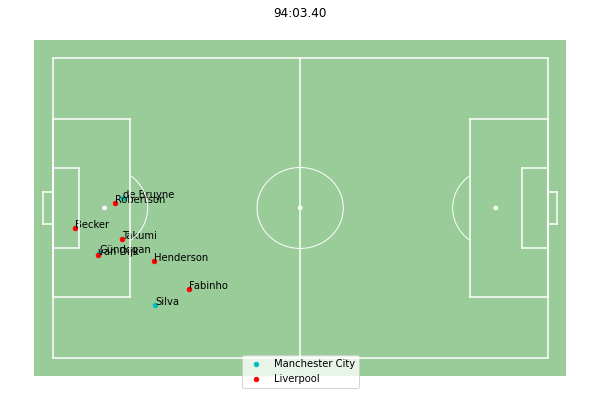

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(105/10, 68/10))
matplotsoccer.field("green", ax=ax, show=False)

for (team, c) in zip(df_tmp['short_name'].unique(), ['c', 'r']):
    df_tmp[df_tmp['short_name']==team].plot.scatter(x='x', y='y', c=c, label=team, ax=ax)

for x, y, txt in df_tmp[['x', 'y', 'last_name']].values.tolist():
    ax.annotate(txt, (x, y))

ax.set_title(df.time.tolist()[-20])
plt.savefig(os.path.join(fig_dir, 'sample.png'), bbox_inches='tight')

plt.show()